In [1]:
!pip install pyvis
!pip install textblob
!pip install pycountry
!pip install wordcloud
!pip install nltk
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 748.9/748.9 KB 23.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.7 MB/s eta 0:00:00
  Created wheel for pyvis: filename=pyvis-0.3.1-py3-none-any.whl size=755850 sha256=65dac84f84ccff4231430b1637c9bc833a6ba689ceb7f7a29b576793639484f4
  Stored in directory: /root/.cache/pip/wheels/a4/0c/61/8469ca276f96ab772c3acc7f47d71e9737cbdf6f446f017f48
Successfully built pyvis
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 71.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requireme

In [2]:
import os
import glob
import snscrape.modules.twitter as sntwitter
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from pyvis.network import Network
import re as re
from textblob import TextBlob
import nltk
import pycountry
import string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px


query = '(Qatar OR Ecuador OR Senegal OR Netherland OR England OR Iran OR USA OR Wales OR Argentina OR Saudi OR Arabia OR Mexico OR Poland OR France OR Australia OR Denmark OR Tunisia OR Spain OR Costa OR Rica OR Germany OR Japan OR Belgium OR Canada OR Morocco OR Croatia OR Brazil OR Serbia OR Switzerland OR Cameroon OR Portugal OR Ghana OR Uruguay OR South OR Korea) (predict OR prediction) (#worldcup2022 OR #worldcup OR #fifa OR #football) lang:en until:2022-12-20 since:2022-11-18'
tweets = []
limit = 3000


for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    
    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.username, tweet.content])
        
df_predict = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet'])
print(df_predict)

# to save to csv
df_predict.to_csv('/content/predict/tweets.csv')



eng_query = '(Qatar OR Ecuador OR Senegal OR Netherland OR England OR Iran OR USA OR Wales OR Argentina OR Saudi OR Arabia OR Mexico OR Poland OR France OR Australia OR Denmark OR Tunisia OR Spain OR Costa OR Rica OR Germany OR Japan OR Belgium OR Canada OR Morocco OR Croatia OR Brazil OR Serbia OR Switzerland OR Cameroon OR Portugal OR Ghana OR Uruguay OR South OR Korea) (#worldcup2022 OR #worldcup OR #fifa OR #football) lang:en until:2022-12-20 since:2022-11-18'
eng_tweets = []
eng_limit = 5000


for tweets in sntwitter.TwitterSearchScraper(eng_query).get_items():
    
    # print(vars(tweet))
    # break
    if len(eng_tweets) == eng_limit:
        break
    else:
        eng_tweets.append([tweets.date, tweets.username, tweets.content, tweets.likeCount, tweets.retweetCount, tweets.replyCount,tweets.quoteCount])
        
df_enagage = pd.DataFrame(eng_tweets, columns=['date', 'user', 'tweets','favorites', 'retweets', 'reply','response'])
print(df_enagage)

# to save to csv
df_enagage.to_csv('/content/predict/eng_tweets.csv')

<ipython-input-2-ec024e7e43d8>:34: FutureWarning: username is deprecated, use user.username instead
  tweets.append([tweet.date, tweet.username, tweet.content])
<ipython-input-2-ec024e7e43d8>:34: FutureWarning: content is deprecated, use rawContent instead
  tweets.append([tweet.date, tweet.username, tweet.content])


                          Date            User  \
0    2022-12-19 19:32:00+00:00       buzzdotie   
1    2022-12-19 18:11:30+00:00       AspiraLtd   
2    2022-12-19 15:40:15+00:00    MawaqifQatar   
3    2022-12-19 15:32:59+00:00  linformatore11   
4    2022-12-19 15:27:33+00:00          V_TBot   
...                        ...             ...   
2995 2022-11-27 18:23:46+00:00        betfirst   
2996 2022-11-27 17:55:05+00:00           K24Tv   
2997 2022-11-27 17:39:33+00:00        RavitasC   
2998 2022-11-27 17:37:14+00:00   phenixfinance   
2999 2022-11-27 17:04:00+00:00       Robiull68   

                                                  Tweet  
0     EA has used its FIFA series to correctly predi...  
1     ARGENTINA WON! \n\nCongratulations to the 10 L...  
2     Congratulations to the winner of JBL Speaker f...  
3     👉Championship Wigan-Sheffield Utd. 21:00\n#cha...  
4     Argentina Fan Token Price Prediction as ARG To...  
...                                                

<ipython-input-2-ec024e7e43d8>:56: FutureWarning: username is deprecated, use user.username instead
  eng_tweets.append([tweets.date, tweets.username, tweets.content, tweets.likeCount, tweets.retweetCount, tweets.replyCount,tweets.quoteCount])
<ipython-input-2-ec024e7e43d8>:56: FutureWarning: content is deprecated, use rawContent instead
  eng_tweets.append([tweets.date, tweets.username, tweets.content, tweets.likeCount, tweets.retweetCount, tweets.replyCount,tweets.quoteCount])


                          date             user  \
0    2022-12-19 23:58:25+00:00   CostOfLivingNI   
1    2022-12-19 23:58:09+00:00  sidelinesprtnws   
2    2022-12-19 23:58:04+00:00  Edouard49636562   
3    2022-12-19 23:56:57+00:00    PassionfootAF   
4    2022-12-19 23:56:26+00:00  NewsFootball365   
...                        ...              ...   
4995 2022-12-19 05:02:43+00:00   venkatesh_vs29   
4996 2022-12-19 05:02:31+00:00     AlgodexIndia   
4997 2022-12-19 05:02:26+00:00  ButListenThough   
4998 2022-12-19 05:02:24+00:00          PrznNaz   
4999 2022-12-19 05:02:19+00:00  VishalHelkarMns   

                                                 tweets  favorites  retweets  \
0     This entire #WorldCup has been shrouded in pol...          1         1   
1     Beautiful art design. (Via/ @durandcreative) #...          0         0   
2     #Chicago is celebrating #Morocco's victory and...          4         0   
3     #Qatar2022: THANK YOU AFRICA❤😍\n\n🇲🇦❤️\n🇸🇳\n🇨🇲...          1 

In [3]:
csv_files = glob.glob('*.{}'.format('csv'))
csv_files

['tweets_3.csv',
 'tweets_1.csv',
 'tweets_2.csv',
 'tweets_5.csv',
 'tweets_4.csv']

In [4]:

connections=[]
filteredConnections=[]


def getWordList(tweet):
    tweet_words = []
    for word in tweet.split(' '):
        if word.startswith('@') and len(word) > 1:
            word = '@user'
        elif word.startswith('http'):
            word = "http"
        elif word.startswith('#'):
            word=word[1:]
        tweet_words.append(word)
    return tweet_words
    
def preProcessor(tweet_words):
    newList=[]
    for word in tweet_words:
        word=word.lower()
        newList.append(word)
    return newList
    
def countryIdentifier(tweet_words,countries):
    Countrycount=0
    for word in tweet_words:
        if word in countries:
            Countrycount+=1
    return Countrycount
    
def makeConnection(tweet_words,countries):
    newConnection=[]
    for word in tweet_words:
        if word in countries:
            newConnection.append(word)
    connections.append(newConnection)    
    
def getTweets(tweetsData):
    tweetsData=tweetsData["Tweet"].to_list()
    return tweetsData

def removeDuplicates(connections,countries):
    tempConnections=[]
    for connection in connections:
        if(connection[0] != connection[1]):
            newConnection=[]
            newConnection=[connection[0],connection[1]]
            tempConnections.append(newConnection)
    return tempConnections

def nodeSize(connections,countries):
    nodeSizes=[10]*32
    for connection in connections:
        countryOne=connection[0]
        countryTwo=connection[1]
        for country in countries:
            if(country==countryOne):
                CountryIndex=countries.index(country)
                nodeSizes[CountryIndex]=nodeSizes[CountryIndex]+1
            elif(country==countryTwo):
                CountryIndex=countries.index(country)
                nodeSizes[CountryIndex]=nodeSizes[CountryIndex]+1
    return nodeSizes
        
def DrawGraph(connections,countries,nodeSizeList):
    g = nx.DiGraph()
    for country in countries:
        nodeSize=nodeSizeList[countries.index(country)]
        g.add_node(country,size=nodeSize)
    for connection in connections:
        g.add_edge(connection[0], connection[1]) 
    nt = Network(directed=False)
    nt.from_nx(g)
    nt.set_edge_smooth('dynamic')
    nt.show('foo.html')
    
def main(tweetsData,countries):
    tweets=getTweets(tweetsData)
    for tweet in tweets:
        tweet_words=getWordList(tweet)
        tweet_words=preProcessor(tweet_words)
        Countrycount=countryIdentifier(tweet_words,countries)
        if(Countrycount==2):
            makeConnection(tweet_words,countries)
    filteredConnections=removeDuplicates(connections,countries)
    nodeSizeList=nodeSize(filteredConnections,countries)
    DrawGraph(filteredConnections,countries,nodeSizeList)
    print(filteredConnections)
            
        
tweetsData = pd.concat([pd.read_csv(f) for f in csv_files ], ignore_index=True)
tweetsData

countries=["qatar","ecuador","senegal","netherland","england","iran","usa","wales","argentina","saudiArabia","mexico","poland","france","australia","denmark" ,"tunisia","spain","costaRica","germany","japan","belgium","canada","morocco","croatia","brazil","serbia","switzerland","cameroon","portugal","ghana","uruguay","southKorea"]
main(tweetsData,countries)

[['portugal', 'morocco'], ['argentina', 'portugal'], ['ghana', 'qatar'], ['morocco', 'france'], ['england', 'france'], ['england', 'france'], ['qatar', 'portugal'], ['morocco', 'france'], ['portugal', 'qatar'], ['france', 'argentina'], ['argentina', 'brazil'], ['morocco', 'france'], ['portugal', 'morocco'], ['portugal', 'morocco'], ['morocco', 'england'], ['england', 'qatar'], ['morocco', 'portugal'], ['england', 'france'], ['croatia', 'france'], ['morocco', 'croatia'], ['argentina', 'france'], ['england', 'france'], ['england', 'france'], ['croatia', 'morocco'], ['spain', 'brazil'], ['qatar', 'morocco'], ['argentina', 'france'], ['croatia', 'morocco'], ['switzerland', 'senegal'], ['france', 'morocco'], ['argentina', 'croatia'], ['argentina', 'france'], ['argentina', 'croatia'], ['france', 'england'], ['qatar', 'argentina'], ['france', 'argentina'], ['morocco', 'portugal'], ['argentina', 'morocco'], ['england', 'portugal'], ['argentina', 'morocco'], ['france', 'england'], ['argentina',

In [5]:
tweetsData.shape

(10000, 4)

In [6]:
csv_files

['tweets_3.csv',
 'tweets_1.csv',
 'tweets_2.csv',
 'tweets_5.csv',
 'tweets_4.csv']

In [7]:


def word_in_text(words, text):
  list_countries=[]
  for word in words:
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
      list_countries.append(word)
  return list_countries
        
tweetsData['country'] = tweetsData['Tweet'].apply(lambda tweet: word_in_text(countries, tweet))


In [8]:
def get_sentiment(tweet):
        # create TextBlob object of cleaned tweet text
        analysis = TextBlob(tweet)
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'



tweetsData['sentiment'] = tweetsData['Tweet'].apply(lambda tweet: get_sentiment(tweet))
tweetsData.head(5)

,Unnamed: 0,Date,User,Tweet,country,sentiment
0,0,2022-12-11 23:59:28+00:00,rmohat77,Olivier #Giroud\n\n In #WorldCup 4 game : 4 g...,[france],negative
1,1,2022-12-11 23:56:40+00:00,VjWale,World Cup Fans In Qatar 😍 https://t.co/H3N2hJY...,[qatar],neutral
2,2,2022-12-11 23:56:09+00:00,drissawaked,@shakira Congrats Morocco!! 🇲🇦🇲🇦\n#WorldCup,[morocco],neutral
3,3,2022-12-11 23:55:39+00:00,barrythomp490,Can anybody give just one word for what is goi...,"[qatar, morocco, portugal]",neutral
4,4,2022-12-11 23:55:38+00:00,swinburne_mark,I’d love to see a #Croatia #Morrocco final. I ...,"[argentina, france, morocco, croatia]",positive


In [9]:
df =  tweetsData.explode('country')

In [10]:
df.head(5)

,Unnamed: 0,Date,User,Tweet,country,sentiment
0,0,2022-12-11 23:59:28+00:00,rmohat77,Olivier #Giroud\n\n In #WorldCup 4 game : 4 g...,france,negative
1,1,2022-12-11 23:56:40+00:00,VjWale,World Cup Fans In Qatar 😍 https://t.co/H3N2hJY...,qatar,neutral
2,2,2022-12-11 23:56:09+00:00,drissawaked,@shakira Congrats Morocco!! 🇲🇦🇲🇦\n#WorldCup,morocco,neutral
3,3,2022-12-11 23:55:39+00:00,barrythomp490,Can anybody give just one word for what is goi...,qatar,neutral
3,3,2022-12-11 23:55:39+00:00,barrythomp490,Can anybody give just one word for what is goi...,morocco,neutral


In [11]:
df_count = pd.DataFrame(df['country'].value_counts())
df_count = df_count.reset_index()
df_count.columns = ['country', 'tweet_count']
df_count.head(5)

,country,tweet_count
0,qatar,3123
1,argentina,2342
2,morocco,1861
3,france,1645
4,england,1143


In [12]:
fig = px.bar(df_count, y='country', x='tweet_count', height=1000,
            title="Top Mentioned Countries")
fig.update_traces(marker_color='steelblue')
fig.update_layout(xaxis_title="tweeet count")
fig.show()

Text(0.5, 0, 'Frequency')

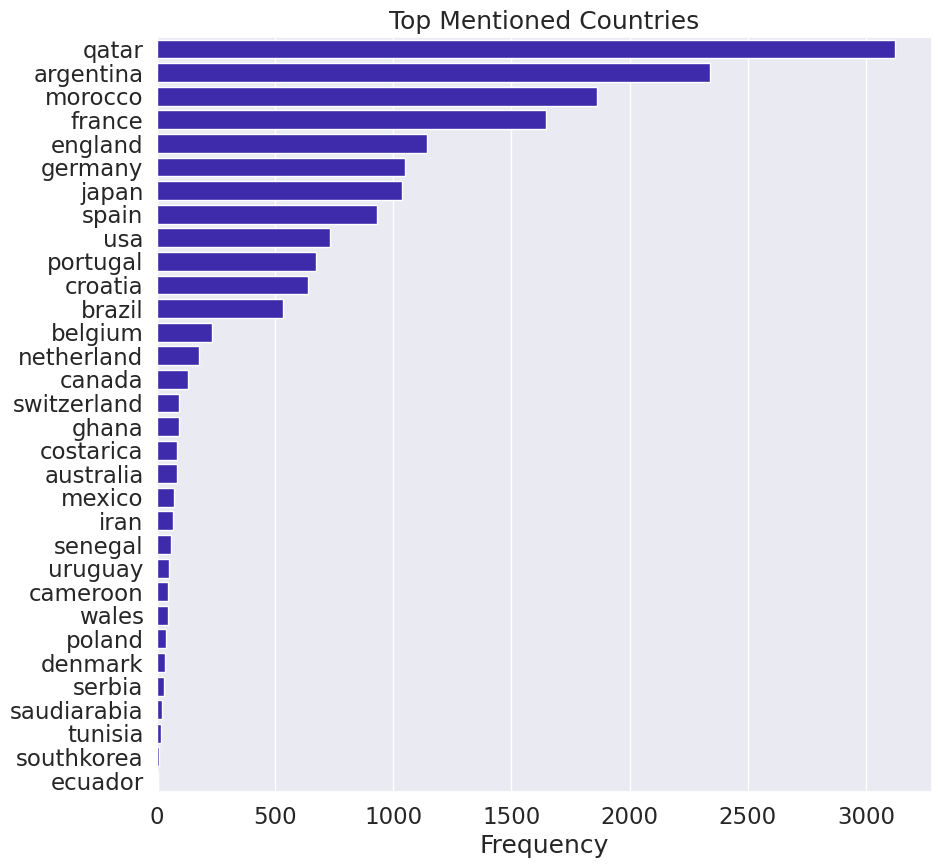

In [13]:


sns.set(font_scale=1.5, rc={"figure.dpi":100, 'savefig.dpi':100})
plt.figure(figsize=(10, 10))


g = sns.barplot(data=df_count, x="tweet_count", y="country", color="#2E15C2")
g.set_title("Top Mentioned Countries")
g.set_ylabel("")
g.set_xlabel("Frequency")

In [14]:
df_count_sentiment = pd.DataFrame(df['sentiment'].value_counts())
df_count_sentiment = df_count_sentiment.reset_index()
df_count_sentiment.columns = ['sentiment', 'tweet_count']
df_count_sentiment.head(5)

,sentiment,tweet_count
0,positive,8643
1,neutral,6178
2,negative,2377


In [15]:
sns.set(font_scale=1.5, rc={"figure.dpi":100, 'savefig.dpi':100})


fig = go.Figure([go.Bar(x=df_count_sentiment['sentiment'], y=df_count['tweet_count'])])
fig.update_traces(marker_color='steelblue')
fig.show()

In [16]:
df_group = df[['country','sentiment']]
df_group.head(5)

,country,sentiment
0,france,negative
1,qatar,neutral
2,morocco,neutral
3,qatar,neutral
3,morocco,neutral


In [17]:
df_group_counts =df_group.groupby(['country','sentiment']).size().reset_index(name='counts')

df_group_counts.head(5)

,country,sentiment,counts
0,argentina,negative,273
1,argentina,neutral,740
2,argentina,positive,1329
3,australia,negative,17
4,australia,neutral,20


In [37]:

#import seaborn as sns


sns.set(font_scale=1.5, rc={"figure.dpi":100, 'savefig.dpi':100})
fig  = px.treemap(df_group_counts, path=[px.Constant("FIFA 2022 Sentiment Analysis"),'country','sentiment'],
                  values='counts',color='sentiment',
                  color_discrete_map={'(?)':'lightgrey', 
                                      'positive':'darkblue', 
                                      'neutral':'lightcyan',
                                      'negative':'indianred'})



fig.data[0]['textfont']['size'] = 18
fig.data[0].textinfo = 'label+value'

fig.update_layout(margin = dict(t=60, l=30, r=30, b=30))
fig.show()

In [38]:
fig = px.pie(df_count_sentiment, values='tweet_count', names='sentiment',title='Percentage Sentiment Analysis on All Tweets',color='sentiment', color_discrete_map={'positive':'darkblue',
                                 'neutral':'lightcyan',
                                 'negative':'indianred'})
fig.data[0]['textfont']['size'] = 18
fig.show()

In [20]:
df_predict['country'] = df_predict['Tweet'].apply(lambda tweet: word_in_text(countries, tweet))

In [21]:
df_predict.head(5)

,Date,User,Tweet,country
0,2022-12-19 19:32:00+00:00,buzzdotie,EA has used its FIFA series to correctly predi...,"[qatar, argentina]"
1,2022-12-19 18:11:30+00:00,AspiraLtd,ARGENTINA WON! \n\nCongratulations to the 10 L...,"[iran, argentina]"
2,2022-12-19 15:40:15+00:00,MawaqifQatar,Congratulations to the winner of JBL Speaker f...,[qatar]
3,2022-12-19 15:32:59+00:00,linformatore11,👉Championship Wigan-Sheffield Utd. 21:00\n#cha...,[england]
4,2022-12-19 15:27:33+00:00,V_TBot,Argentina Fan Token Price Prediction as ARG To...,[argentina]


In [22]:
d_predict = df_predict.explode('country')
d_predict.head(5)

,Date,User,Tweet,country
0,2022-12-19 19:32:00+00:00,buzzdotie,EA has used its FIFA series to correctly predi...,qatar
0,2022-12-19 19:32:00+00:00,buzzdotie,EA has used its FIFA series to correctly predi...,argentina
1,2022-12-19 18:11:30+00:00,AspiraLtd,ARGENTINA WON! \n\nCongratulations to the 10 L...,iran
1,2022-12-19 18:11:30+00:00,AspiraLtd,ARGENTINA WON! \n\nCongratulations to the 10 L...,argentina
2,2022-12-19 15:40:15+00:00,MawaqifQatar,Congratulations to the winner of JBL Speaker f...,qatar


In [23]:
df_predicted_counts =d_predict.groupby(['country']).count().reset_index()
df_predicted_counts.head(5)

,country,Date,User,Tweet
0,argentina,1074,1074,1074
1,australia,89,89,89
2,belgium,40,40,40
3,brazil,365,365,365
4,cameroon,58,58,58


In [24]:
df_pre_counts =d_predict.groupby(['country']).count().sort_values(by='Tweet', ascending=False).reset_index()

df_pre_counts.head(5)

,country,Date,User,Tweet
0,argentina,1074,1074,1074
1,qatar,1026,1026,1026
2,france,964,964,964
3,morocco,472,472,472
4,croatia,457,457,457


In [25]:
fig = px.bar(df_pre_counts, y='country', x='Tweet', height=1000,
            title="Top Mentioned Countries with Keyword Predict")
fig.update_traces(marker_color='steelblue')
fig.update_layout(xaxis_title="tweeet count")
fig.show()

Text(0.5, 0, 'Frequency')

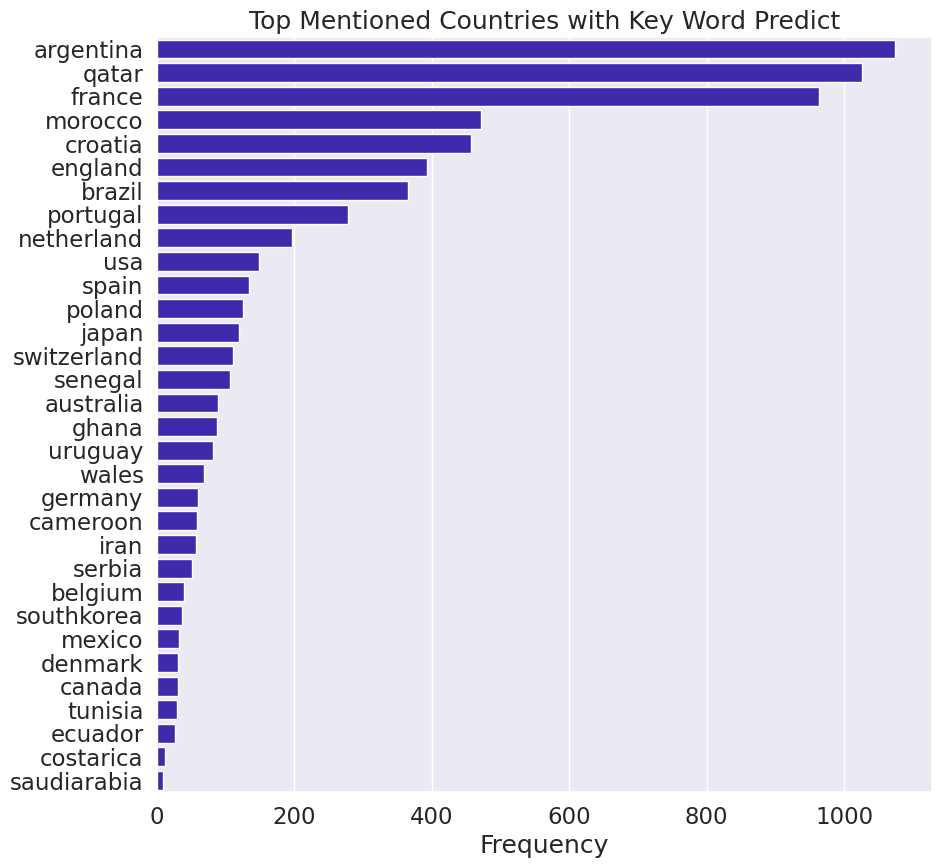

In [26]:
sns.set(font_scale=1.5, rc={"figure.dpi":100, 'savefig.dpi':100})
plt.figure(figsize=(10, 10))


g = sns.barplot(data=df_pre_counts, x="Tweet", y="country",color="#2E15C2")
g.set_title("Top Mentioned Countries with Key Word Predict")
g.set_ylabel("")
g.set_xlabel("Frequency")

In [27]:
df_enagage['country'] = df_enagage['tweets'].apply(lambda tweet: word_in_text(countries, tweet))
d_enage = df_enagage.explode('country')
d_enage.head(5)

,date,user,tweets,favorites,retweets,reply,response,country
0,2022-12-19 23:58:25+00:00,CostOfLivingNI,This entire #WorldCup has been shrouded in pol...,1,1,0,0,qatar
1,2022-12-19 23:58:09+00:00,sidelinesprtnws,Beautiful art design. (Via/ @durandcreative) #...,0,0,0,0,qatar
1,2022-12-19 23:58:09+00:00,sidelinesprtnws,Beautiful art design. (Via/ @durandcreative) #...,0,0,0,0,argentina
2,2022-12-19 23:58:04+00:00,Edouard49636562,#Chicago is celebrating #Morocco's victory and...,4,0,0,0,qatar
2,2022-12-19 23:58:04+00:00,Edouard49636562,#Chicago is celebrating #Morocco's victory and...,4,0,0,0,morocco


In [28]:
df_engage_count = d_enage.groupby(['country']).agg({'favorites':'sum','retweets':'sum'}).sort_values(by='favorites', ascending=False).reset_index()
df_engage_count.head(5)

,country,favorites,retweets
0,argentina,43913,6809
1,qatar,18897,3944
2,france,11498,1924
3,spain,1149,168
4,usa,868,203


In [29]:
df_eng =df_engage_count.melt(id_vars=['country'], value_vars=['favorites', 'retweets'])
df_eng.head(5)
df_top_eng = df_eng.nlargest(10, 'value')

In [30]:
sns.set(font_scale=1.5, rc={"figure.dpi":100, 'savefig.dpi':100})
plt.figure(figsize=(10, 10))

fig = px.histogram(df_top_eng, x="country", y="value",
             color='variable', barmode='group',
             color_discrete_map={ 'favorites':'indianred', 
                                  'retweets':'lightseagreen'}, title="Engagement Analysis: Retweets and Likes")
fig.update_layout(legend_title_text='Engagement', xaxis_title="country",yaxis_title="total engagement")
fig.show()

<Figure size 1000x1000 with 0 Axes>

In [31]:
df_response_count = d_enage.groupby(['country']).agg({'reply':'sum','response':'sum'}).sort_values(by='reply', ascending=False).reset_index()
df_response_count.head(5)

,country,reply,response
0,argentina,1903,584
1,qatar,1027,359
2,france,474,140
3,usa,50,23
4,england,44,15


In [32]:
df_response_count.rename(columns={"response": "quote"},inplace=True)
df_response_count.head(5)

,country,reply,quote
0,argentina,1903,584
1,qatar,1027,359
2,france,474,140
3,usa,50,23
4,england,44,15


In [33]:
df_res =df_response_count.melt(id_vars=['country'], value_vars=['reply', 'quote'])
df_res.head(5)
df_top_res = df_res.nlargest(10, 'value')

In [34]:
sns.set(font_scale=1.5, rc={"figure.dpi":100, 'savefig.dpi':100})
plt.figure(figsize=(10, 10))

fig = px.histogram(df_top_res, x="country", y="value",
             color='variable', barmode='group',
             color_discrete_map={ 
                                      'quote':'lightsteelblue', 
                                      'reply':'darkblue'}, title="Engagement Analysis: Replies and Quotes")
fig.update_layout(legend_title_text='Engagement', xaxis_title="country",yaxis_title="total engagement")
fig.show()

<Figure size 1000x1000 with 0 Axes>